In [1]:
from data import main, util, maps
from utilities import display_tools, data_preparation
import pandas as pd
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests


from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from selenium.webdriver.chrome.service import Service
import time
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException, WebDriverException
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException#, NoSuchElementException
from selenium.common.exceptions import NoSuchElementException


ImportError: cannot import name 'main' from 'data' (unknown location)

In [95]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
import time

url = 'https://www.whoscored.com/Regions/252/Tournaments/7/Seasons/9622/Stages/22080/Fixtures/England-Championship-2023-2024'

# Set up Chrome options
options = Options()
options.add_experimental_option('excludeSwitches', ['enable-logging'])

# Initialize the driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# URL to visit
driver.get(url)
wait = WebDriverWait(driver, 5)
try:
    cookie_btn = wait.until(
        EC.element_to_be_clickable((By.XPATH, "//*[contains(text(), \"AGREE\")]"))
    )
    cookie_btn.click()
except TimeoutException:
    print("No cookie acceptance button found, continuing...")

# List to hold all links
all_links = []
previous_page_content = None

while True:
    # Wait for the elements to be present and gather links
    try:
        wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "a[id^='scoresBtn-']")))
        score_buttons = driver.find_elements(By.CSS_SELECTOR, "a[id^='scoresBtn-']")
        new_links = [btn.get_attribute('href') for btn in score_buttons]
        all_links.extend(new_links)
        current_page_content = driver.find_element(By.TAG_NAME, 'html').get_attribute('innerHTML')
        if current_page_content == previous_page_content:
            print("No change in page content, stopping...")
            break
        previous_page_content = current_page_content
        #print(f"Collected {len(new_links)} links on current page.")
    except TimeoutException:
        print("Failed to find elements with the specified ID pattern.")

    # Try to click the previous page button, if it fails, break the loop
    try:
        prev_button = driver.find_element(By.XPATH, '//*[@id="dayChangeBtn-prev"]')
        prev_button.click()
        print("Attempting to move to the previous page...")
        time.sleep(5)  # Wait for potential page content to load
    except (NoSuchElementException, TimeoutException):
        print("No previous page button found or it's disabled, stopping...")
        break

# Print all collected links
print(f"Total collected links: {len(all_links)}")

# Cleanup
driver.quit()


Attempting to move to the previous page...
Attempting to move to the previous page...
Attempting to move to the previous page...
Attempting to move to the previous page...
Attempting to move to the previous page...
Attempting to move to the previous page...
Attempting to move to the previous page...
Attempting to move to the previous page...
Attempting to move to the previous page...
Attempting to move to the previous page...
Attempting to move to the previous page...
Failed to find elements with the specified ID pattern.


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=125.0.6422.142)
Stacktrace:
0   chromedriver                        0x000000010115d6b8 chromedriver + 6149816
1   chromedriver                        0x0000000101154cda chromedriver + 6114522
2   chromedriver                        0x0000000100be1d5c chromedriver + 400732
3   chromedriver                        0x0000000100bb7294 chromedriver + 225940
4   chromedriver                        0x0000000100c5a6fd chromedriver + 894717
5   chromedriver                        0x0000000100c70a98 chromedriver + 985752
6   chromedriver                        0x0000000100c51a53 chromedriver + 858707
7   chromedriver                        0x0000000100c216d5 chromedriver + 661205
8   chromedriver                        0x0000000100c21f6e chromedriver + 663406
9   chromedriver                        0x000000010111ecf0 chromedriver + 5893360
10  chromedriver                        0x00000001011244bc chromedriver + 5915836
11  chromedriver                        0x00000001011008b4 chromedriver + 5769396
12  chromedriver                        0x0000000101124f89 chromedriver + 5918601
13  chromedriver                        0x00000001010f1ec4 chromedriver + 5709508
14  chromedriver                        0x0000000101145008 chromedriver + 6049800
15  chromedriver                        0x00000001011451c7 chromedriver + 6050247
16  chromedriver                        0x000000010115488e chromedriver + 6113422
17  libsystem_pthread.dylib             0x00007ff81252818b _pthread_start + 99
18  libsystem_pthread.dylib             0x00007ff812523ae3 thread_start + 15


In [98]:
all_links

['https://www.whoscored.com/Matches/1731953/Live/England-Championship-Ipswich-Huddersfield',
 'https://www.whoscored.com/Matches/1731955/Live/England-Championship-Leeds-Southampton',
 'https://www.whoscored.com/Matches/1731956/Live/England-Championship-Leicester-Blackburn',
 'https://www.whoscored.com/Matches/1731957/Live/England-Championship-Middlesbrough-Watford',
 'https://www.whoscored.com/Matches/1731958/Live/England-Championship-Plymouth-Hull',
 'https://www.whoscored.com/Matches/1731960/Live/England-Championship-Stoke-Bristol-City',
 'https://www.whoscored.com/Matches/1731962/Live/England-Championship-Sunderland-Sheffield-Wednesday',
 'https://www.whoscored.com/Matches/1731964/Live/England-Championship-West-Bromwich-Albion-Preston',
 'https://www.whoscored.com/Matches/1731965/Live/England-Championship-Coventry-Queens-Park-Rangers',
 'https://www.whoscored.com/Matches/1731979/Live/England-Championship-Rotherham-Cardiff',
 'https://www.whoscored.com/Matches/1731980/Live/England-Ch

In [99]:
team = 'Queens-Park-Rangers'
team_urls = [l for l in all_links if team in l]
team_urls = list(set(team_urls))

In [100]:
len(team_urls)

46

In [ ]:
json_data['score']

In [103]:
df_list = [fetch_match_data(link) for link in team_urls]
team_df = pd.concat(df_list, axis=0)
team_df.to_csv(f'raw_data/{team}_data.csv', index=False)

In [ ]:
team_df

In [ ]:
league_urls = {'Premier League': 'https://1xbet.whoscored.com/Regions/252/Tournaments/2/England-Premier-League',
 'Championship' : 'https://1xbet.whoscored.com/Regions/252/Tournaments/7/England-Championship',
 'Serie A': 'https://1xbet.whoscored.com/Regions/108/Tournaments/5/Italy-Serie-A',
 'LaLiga': 'https://1xbet.whoscored.com/Regions/206/Tournaments/4/Spain-LaLiga',
 'Bundesliga': 'https://1xbet.whoscored.com/Regions/81/Tournaments/3/Germany-Bundesliga',
 'Ligue 1': 'https://1xbet.whoscored.com/Regions/74/Tournaments/22/France-Ligue-1',
 'Liga Portugal': 'https://1xbet.whoscored.com/Regions/177/Tournaments/21/Portugal-Liga-Portugal',
 'Eredivisie': 'https://1xbet.whoscored.com/Regions/155/Tournaments/13/Netherlands-Eredivisie',
 'Russian Premier League': 'https://1xbet.whoscored.com/Regions/182/Tournaments/77/Russia-Premier-League',
 'Brasileirão': 'https://1xbet.whoscored.com/Regions/31/Tournaments/95/Brazil-Brasileir%C3%A3o',
 'Major League Soccer': 'https://1xbet.whoscored.com/Regions/233/Tournaments/85/USA-Major-League-Soccer',
 'Super Lig': 'https://1xbet.whoscored.com/Regions/225/Tournaments/17/Turkey-Super-Lig',
 'Championship': 'https://1xbet.whoscored.com/Regions/252/Tournaments/7/England-Championship',
 'Premiership': 'https://1xbet.whoscored.com/Regions/253/Tournaments/20/Scotland-Premiership',
 'League One': 'https://1xbet.whoscored.com/Regions/252/Tournaments/8/England-League-One',
 'League Two': 'https://1xbet.whoscored.com/Regions/252/Tournaments/9/England-League-Two',
 'Liga Profesional': 'https://1xbet.whoscored.com/Regions/11/Tournaments/68/Argentina-Liga-Profesional',
 'Jupiler Pro League': 'https://1xbet.whoscored.com/Regions/22/Tournaments/18/Belgium-Jupiler-Pro-League',
 '2. Bundesliga': 'https://1xbet.whoscored.com/Regions/81/Tournaments/6/Germany-2-Bundesliga',
 'Champions League': 'https://1xbet.whoscored.com/Regions/250/Tournaments/12/Europe-Champions-League',
 'Europa League': 'https://1xbet.whoscored.com/Regions/250/Tournaments/30/Europe-Europa-League',
 'FA Cup': 'https://1xbet.whoscored.com/Regions/252/Tournaments/26/England-FA-Cup',
 'League Cup': 'https://1xbet.whoscored.com/Regions/252/Tournaments/29/England-League-Cup',
 'European Championship': 'https://1xbet.whoscored.com/Regions/247/Tournaments/124/International-European-Championship',
 "Women's Super League": 'https://1xbet.whoscored.com/Regions/252/Tournaments/739/England-Women-s-Super-League',
 'Africa Cup of Nations': 'https://1xbet.whoscored.com/Regions/247/Tournaments/104/International-Africa-Cup-of-Nations'}

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
def fetch_fixtures(url):
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    divs = soup.find_all('div')
    scripts = [d for d in divs if d.find('script')]
    sidebar = [d for d in divs if d.find('div', {'id': 'sidebar3'})]
    element = sidebar[0]
    text = element.find_all('script')[4]
    data = json.loads(text.string.strip('<!-- ').strip(' -->'))
    fixtures = []
    for m in data['tournaments'][0]['matches']:
        id = f"https://www.whoscored.com/Matches/{m['id']}/Live"
        home_team = m['homeTeamName']
        away_team = m['awayTeamName']
        date = m['startTime']
        fixtures.append({'id': id, 'home team': home_team, 'away team': away_team, 'date': date})
    return fixtures


In [102]:
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd

def fetch_match_data(url, headers=None, cookies=None):
    """
    Fetch and parse match data from WhoScored.com based on the provided URL.

    Args:
        url (str): The complete URL to fetch the match data.
        headers (dict, optional): HTTP headers to use for the request.
        cookies (dict, optional): Cookies to use for the request.

    Returns:
        tuple: A tuple containing a dictionary of player ID to player names, and a DataFrame of match events.
    """
    id = url.split('/')[-3]
    if headers is None:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Connection': 'keep-alive'
        }

    response = requests.get(url, headers=headers, cookies=cookies)
    if response.status_code != 200:
        raise Exception(f"Failed to fetch data, status code: {response.status_code}")

    soup = BeautifulSoup(response.text, 'html.parser')
    script_text = next((s.text for s in soup.find_all('script') if 'matchCentreData' in s.text), None)
    if not script_text:
        raise ValueError("Match data script not found in the page.")
    match = re.search(r"matchCentreData: (\{.*?\}),\s*matchCentreEventTypeJson", script_text, re.DOTALL)
    if not match:
        raise ValueError("Failed to extract match data from the script.")

    json_data = json.loads(match.group(1))
    event_df = json_data_to_df(json_data)
    event_df['matchId'] = id
    event_df['score'] = json_data['score']
    return event_df

def json_data_to_df(json_data):
    """
    Convert JSON match data to a pandas DataFrame.

    Args:
        json_data (dict): The JSON data extracted from the match page.

    Returns:
        tuple: A tuple containing a dictionary of player IDs to names and the DataFrame of events.
    """
    player_id_name_dict = json_data.get('playerIdNameDictionary', {})
    team_dict = {
        json_data['home']['teamId']: json_data['home']['name'],
        json_data['away']['teamId']: json_data['away']['name']
    }
    h_a_dict = { json_data['home']['teamId']:'h', json_data['away']['teamId']: 'a'
                }

    df = pd.DataFrame(json_data['events'])
    df = clean_event_data(df, team_dict, player_id_name_dict, h_a_dict)
    return  df

def clean_event_data(df, team_dict, player_id_name_dict, h_a_dict):
    """
    Clean and prepare event data.

    Args:
        df (pd.DataFrame): DataFrame of events to clean.
        team_dict (dict): Dictionary of team IDs to team names.
        player_id_name_dict (dict): Dictionary of player IDs to player names.

    Returns:
        pd.DataFrame: The cleaned DataFrame.
    """
    df['outcomeType'] = df['outcomeType'].map(lambda x: x['displayName'])
    df['type'] = df['type'].map(lambda x: x['displayName'])
    df['period'] = df['period'].map(lambda x: x['displayName'])
    df['teamName'] = df['teamId'].map(team_dict)
    df['h_a'] = df['teamId'].map(h_a_dict)
    df['playerId'] = df['playerId'].astype(str).str.split('.').str[0]
    df['playerName'] = df['playerId'].map(lambda x: player_id_name_dict.get(x, np.nan))
    df.sort_values(['minute', 'second'], inplace=True)
    return df


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import visuals
import seaborn as sns
import requests
import os

# Data creation

In [ ]:
match_urls = maps.get_matches_url('Premier League', '2023/2024')

In [ ]:
from utilities import display_tools

display_tools.show_team_names(match_urls)

In [ ]:
team = maps.get_team_data('Manchester City', 'Premier League', '2023/2024')

In [ ]:
team.to_csv('raw_data/ManCity.csv', index=False)

# Data Filtering

In [ ]:
# player = display_tools.show_player_names(df)[2]
# dfp = df[df['playerName'] == player]

In [ ]:
ddf = data_preparation.data_loader('raw_data/Palmeiras_data.csv', toi = True)

In [ ]:
df = ddf['all'][0]

In [ ]:
df.type.unique()

In [ ]:
binsize = (20,20)

In [ ]:
from statparmap import preprocessing
maps_stats = {}

for m in df.matchId.unique():

    dfm = df[df['matchId'] == m]
    maps_stats[m] = preprocessing.preprocess_df(dfm, binsize = binsize)


In [ ]:
goals_conceded = [x[0] for x in df.groupby('matchId').first()[['goals_conceded']].values.astype(int)]
goals_scored = [x[0] for x in df.groupby('matchId').first()[['goals_scored']].values.astype(int)]

# Example Data Generation
s_map = np.array([x['statistic'] for x in maps_stats.values()])
# Zero out the corners for each page


In [ ]:
s_map.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the array to simplify analysis
data_flattened = s_map.flatten()

# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data_flattened, kde=True)
plt.title('Histogram of s_map Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plotting the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_flattened)
plt.title('Box Plot of s_map Values')
plt.xlabel('Value')
plt.show()


In [ ]:
processed_s_map = preprocessing.outlier_filtering(s_map, binsize = binsize)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the array to simplify analysis
data_flattened = processed_s_map.flatten()

# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data_flattened, kde=True)
plt.title('Histogram of s_map Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plotting the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_flattened)
plt.title('Box Plot of s_map Values')
plt.xlabel('Value')
plt.show()


In [ ]:
len(goals_conceded) == len(maps_stats)


In [ ]:
X = pd.DataFrame({
    'goals_scored': goals_scored,
    'goals_conceded': goals_conceded})
X['intercept'] = 1
X = X[['intercept', 'goals_scored','goals_conceded']]
contrast = np.array([0, 1, 0])

In [ ]:
from statparmap import static_correlation

In [ ]:
res = static_correlation.perform_correlation_analysis2(processed_s_map, X, binsize= binsize, contrast = contrast, mtc=False, cluster_correction=True)

In [ ]:
from visuals import show_map

show_map.plot_map(maps_stats, res , significant=False)

# Player Analysis

In [ ]:
ddf = data_preparation.data_loader('raw_data/Tottenham.csv', toi = True)

In [ ]:
df = ddf['all'][0]

In [ ]:
display_tools.show_player_names(df)

In [ ]:
dfp = df[df['playerName'] == 'Pedro Porro']

In [ ]:
binsize

In [ ]:
from statparmap import preprocessing
maps_stats = {}

for m in dfp.matchId.unique():

    dfm = dfp[dfp['matchId'] == m]
    maps_stats[m] = preprocessing.preprocess_df(dfm, binsize = binsize)

In [ ]:
goals_conceded = [x[0] for x in dfp.groupby('matchId').first()[['goals_conceded']].values.astype(int)]
goals_scored = [x[0] for x in dfp.groupby('matchId').first()[['goals_scored']].values.astype(int)]

# Example Data Generation
s_map = np.array([x['statistic'] for x in maps_stats.values()])
processed_s_map = preprocessing.outlier_filtering(s_map, binsize = binsize)


In [ ]:
len(goals_conceded) == len(maps_stats)


In [ ]:
X = pd.DataFrame({
    'goals_scored': goals_scored,
    'goals_conceded': goals_conceded})
X['intercept'] = 1
X = X[['intercept', 'goals_scored','goals_conceded']]
contrast = np.array([0, 1, 0])

In [ ]:
s_map.shape

In [ ]:
res = static_correlation.perform_correlation_analysis2(processed_s_map, X, binsize= binsize, contrast = contrast, cluster_correction=True)
show_map.plot_map(maps_stats, res , significant=False)

In [ ]:
# Plotting
result = list(maps_stats.values())[0]
result['statistic'] = res[0]

pitch = Pitch(pitch_type='opta', line_zorder=4,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
pcm = pitch.heatmap(result, ax=ax, cmap='hot', edgecolors='#22312b')#, vmax = 0.01)
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

# Connectivity Analysis

In [6]:
from FSPM.utilities import conn_data_preparation, data_preparation
df_passes, df_all_events =  conn_data_preparation.prepare_data('FSPM/raw_data/Inter_data.csv')

/Users/michele/code/micheledeantoni/FSPM/FSPM/utilities/data_preparation.py:55: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fpath)


In [7]:

filtered_pass_data = data_preparation.filter_pass_data_by_top_players(df_passes, df_all_events)

In [9]:
from FSPM.funcon import network_metrics

network_metrics.get_players_with_max_metrics(network_metrics.compute_pass_network_metrics(filtered_pass_data))

{'degree_centrality': ('Hakan Çalhanoglu', 0.8526078759949728),
 'betweenness_centrality': ('Nicolò Barella', 0.7406181426576603),
 'closeness_centrality': ('Francesco Acerbi', 0.8044444444444444),
 'eigenvector_centrality': ('Hakan Çalhanoglu', 0.8368590629189689),
 'clustering_coefficient': ('Juan Cuadrado', 1.0)}

In [148]:
import pandas as pd
import networkx as nx

# Sample filtered_data (assuming this comes from previous steps)
# filtered_data = ...

pass_df = filtered_pass_data
# Step 2: Create pass networks for each match
matches = pass_df['matchId'].unique()

# Create pass counts
pass_counts = pass_df.groupby(['matchId', 'playerName', 'pass_recipient_name']).size().reset_index(name='pass_count')

networks = {}

for match in matches:
    match_data = pass_df[pass_df['matchId'] == match]
    G = nx.DiGraph()

    for _, row in match_data.iterrows():
        player_from = row['playerName']
        player_to = row['pass_recipient_name']
        pass_count = pass_counts[(pass_counts['matchId'] == match) &
                                 (pass_counts['playerName'] == player_from) &
                                 (pass_counts['pass_recipient_name'] == player_to)]['pass_count'].values[0]
        G.add_edge(player_from, player_to, weight=pass_count)

    networks[match] = G

# Step 3: Compute network metrics
metrics = []

for match, G in networks.items():
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)
    #density = nx.density(G)
    clustering_coefficient = nx.clustering(G.to_undirected())

    for player in G.nodes():
        metrics.append({
            'matchId': match,
            'player': player,
            'degree_centrality': degree_centrality.get(player, 0),
            'betweenness_centrality': betweenness_centrality.get(player, 0),
            'closeness_centrality': closeness_centrality.get(player, 0),
            'eigenvector_centrality': eigenvector_centrality.get(player, 0),
            #'density': density,
            'clustering_coefficient': clustering_coefficient.get(player, 0)
        })

# Step 4: Create DataFrame and normalize numeric columns
metrics_df = pd.DataFrame(metrics)

# Convert appropriate columns to numeric
numeric_columns = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'eigenvector_centrality', 
                   #'density',
                   'clustering_coefficient']
metrics_df[numeric_columns] = metrics_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Normalize numeric columns for each match
normalized_df = metrics_df.copy()
for match in matches:
    match_mask = normalized_df['matchId'] == match
    normalized_df.loc[match_mask, numeric_columns] = (normalized_df.loc[match_mask, numeric_columns] - normalized_df.loc[match_mask, numeric_columns].min()) / (normalized_df.loc[match_mask, numeric_columns].max() - normalized_df.loc[match_mask, numeric_columns].min())

# Step 5: Aggregate metrics
aggregated_metrics = normalized_df.groupby('player').mean().reset_index()
aggregated_metrics.drop('matchId', axis=1, inplace=True)
# Display the aggregated metrics
(aggregated_metrics.head())


,player,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,clustering_coefficient
0,Alessandro Bastoni,0.663028,0.575034,0.651876,0.636270,0.241071
1,Alexis Sánchez,0.613889,0.462286,0.648504,0.632358,0.166667
2,Benjamin Pavard,0.651468,0.695694,0.764141,0.687797,0.263158
3,Carlos Augusto,0.390707,0.283238,0.414629,0.426439,0.539041
4,Davide Frattesi,0.334444,0.157004,0.144017,0.174153,0.475000


In [152]:
import pandas as pd

def get_players_with_max_metrics(aggregated_metrics):
    # Dictionary to store the results
    max_players = {}

    # Iterate over each column in the DataFrame except the 'player' column
    for column in aggregated_metrics.columns:
        if column != 'player':
            # Find the player with the maximum value in the current column
            max_player = aggregated_metrics.loc[aggregated_metrics[column].idxmax(), 'player']
            max_value = aggregated_metrics[column].max()
            
            # Store the result in the dictionary
            max_players[column] = (max_player, max_value)
    
    return max_players

# Example usage:
# aggregated_metrics is assumed to be your DataFrame
max_players = get_players_with_max_metrics(aggregated_metrics)
for metric, (player, value) in max_players.items():
    print(f"Player with max {metric}: {player} (Value: {round(value,3)})")


Player with max degree_centrality: Hakan Çalhanoglu (Value: 0.853)
Player with max betweenness_centrality: Nicolò Barella (Value: 0.741)
Player with max closeness_centrality: Francesco Acerbi (Value: 0.804)
Player with max eigenvector_centrality: Hakan Çalhanoglu (Value: 0.837)
Player with max clustering_coefficient: Juan Cuadrado (Value: 1.0)


In [154]:
aggregated_metrics.sort_values('closeness_centrality', ascending=False)

,player,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,clustering_coefficient
8,Francesco Acerbi,0.720149,0.728606,0.804444,0.742382,0.041667
9,Hakan Çalhanoglu,0.852608,0.722326,0.789984,0.836859,0.205060
2,Benjamin Pavard,0.651468,0.695694,0.764141,0.687797,0.263158
17,Nicolò Barella,0.792235,0.740618,0.761369,0.758585,0.186275
6,Emil Audero,0.438095,0.686407,0.730769,0.430768,0.333333
18,Stefan de Vrij,0.530857,0.491230,0.684938,0.621689,0.351679
0,Alessandro Bastoni,0.663028,0.575034,0.651876,0.636270,0.241071
1,Alexis Sánchez,0.613889,0.462286,0.648504,0.632358,0.166667
10,Henrikh Mkhitaryan,0.595359,0.536278,0.635524,0.605406,0.325765
20,Yann Sommer,0.447774,0.358720,0.566998,0.545956,0.355415


# Conn approach 

In [1]:
from utilities import conn_data_preparation
from funcon import conn_preprocessing, conn_correlation

# Define all the functions here (omitted for brevity, assuming they are already defined)

# Load and prepare data
df_passes, df_all_events = conn_data_preparation.prepare_data('raw_data/Milan_data.csv')

# Process all matches
all_connectivity_matrices, all_player_times = conn_preprocessing.process_matches(df_all_events)


ModuleNotFoundError: No module named 'utilities'

In [2]:

# Create a master list of all players who appeared in any match
all_players = set()
for player_times in all_player_times:
    all_players.update(player_times.keys())
all_players = sorted(list(all_players))

# Align each match's connectivity matrix to this master list
aligned_connectivity_matrices, avg_connectivity_matrix = conn_preprocessing.align_connectivity_matrices(all_connectivity_matrices, all_player_times, all_players)



NameError: name 'all_player_times' is not defined

In [131]:

# Group data by matchId and create the design matrix
design_matrix = df_all_events.groupby('matchId').first()[['goals_scored', 'goals_conceded']]
design_matrix['intercept'] = 1  # Add intercept term
design_matrix = design_matrix[['intercept', 'goals_scored', 'goals_conceded']]

# Convert design matrix to numpy array
X = design_matrix.values

# Flatten connectivity matrices for regression analysis
Y = np.array([matrix.flatten() for matrix in aligned_connectivity_matrices])

# Ensure there are no missing values in the design matrix
assert not np.any(np.isnan(X)), "Design matrix contains NaN values"

# Ensure there are no missing values in the response variables
assert not np.any(np.isnan(Y)), "Response variable matrix contains NaN values"


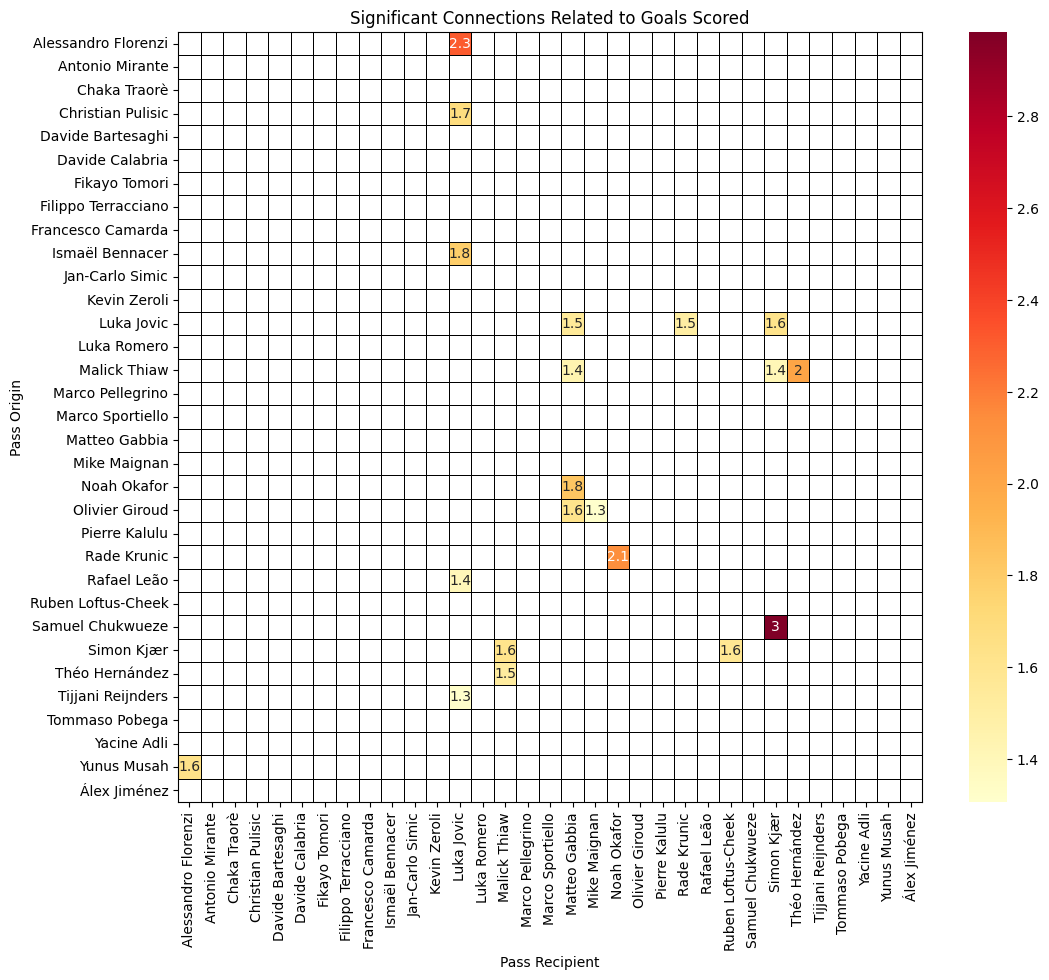

In [132]:
from visuals import conn_visualization
# Specify the index for the contrast (example: 1 for 'goals_scored' and 2 for 'goals_conceded')
contrast_index = 2  # Example: 'goals_scored'
# Perform regression analysis for the specified contrast
positive_contrast = False  # Set to False for negative contrast
coefs, pvals = conn_correlation.perform_regression_with_contrast(Y, X, contrast_index, positive=positive_contrast)

# Reshape coefficients and p-values to the original connectivity matrix shape
coef_matrix = coefs.reshape((len(all_players), len(all_players)))
pval_matrix = pvals.reshape((len(all_players), len(all_players)))

# Identify significant connections
significant_connections = pval_matrix < 0.05

# Visualize p-values
conn_visualization.visualize_pvalues(pval_matrix, all_players)


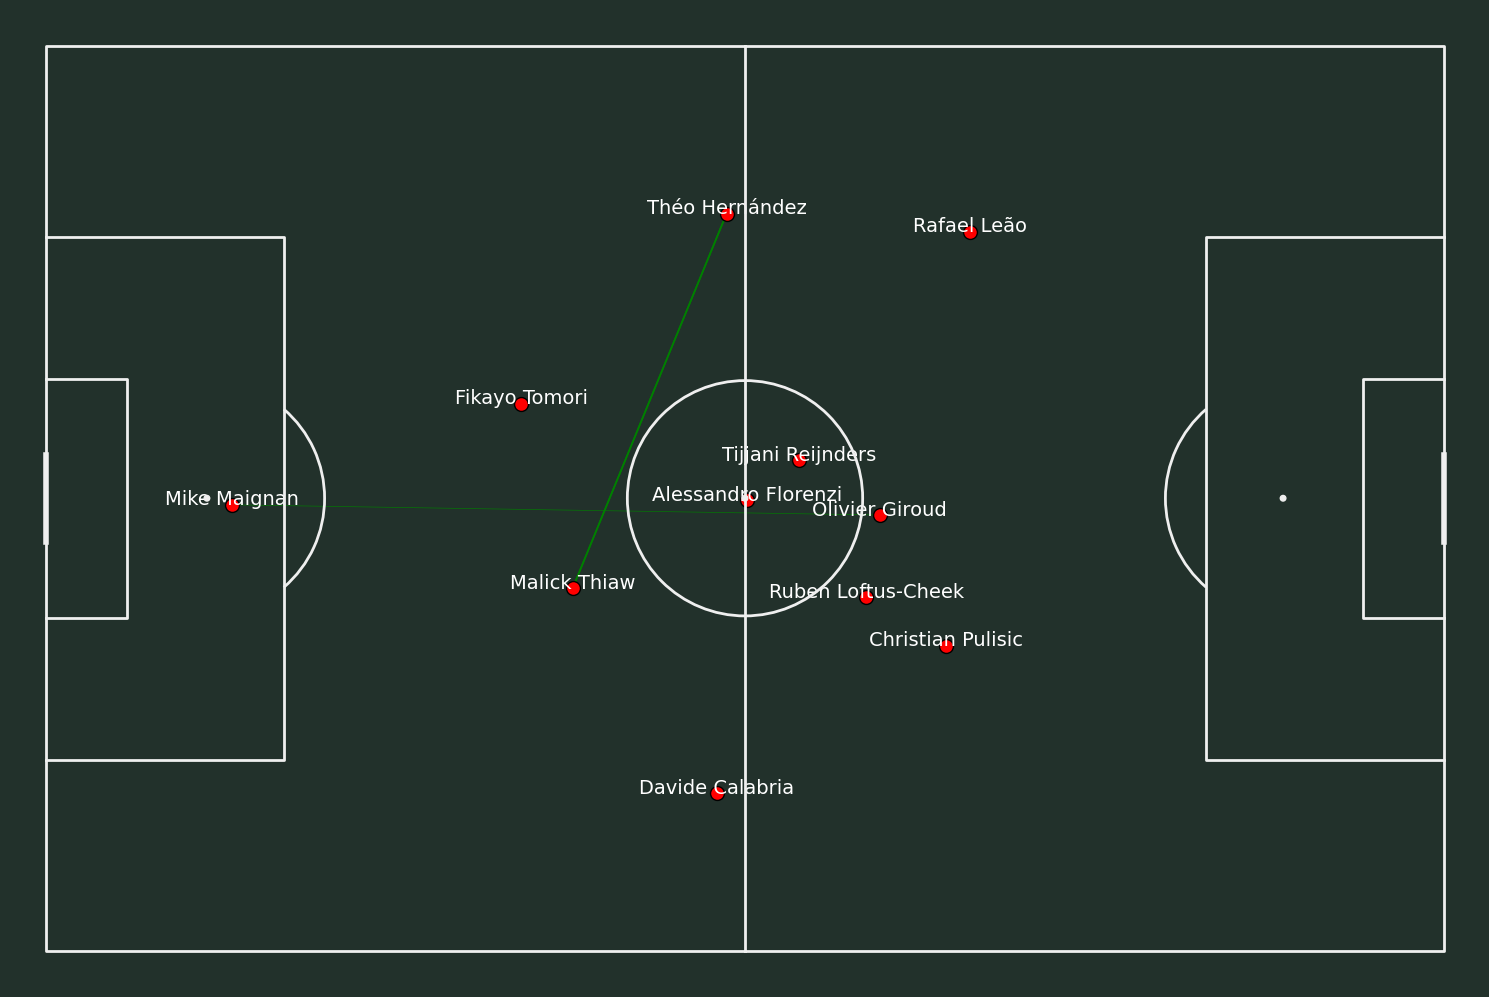

In [133]:
from visuals import conn_visualization

# Example usage
dropdowns, UI = conn_visualization.create_player_selection_ui(
    df_passes,
    conn_visualization.handle_player_selection,
    avg_connectivity_matrix,
    significant_connections,
    all_players
)

# Initial plot with the most frequent starting eleven
selected_players = [dropdown.value for dropdown in dropdowns]
conn_visualization.plot_players_and_significant_connections_mplsoccer(
    df_passes, selected_players, avg_connectivity_matrix, significant_connections, all_players
)


In [ ]:
import pandas as pd
import numpy as np

# Sample data structure for the match events
# Adjust the data structure as needed for your specific use case
data = data_preparation.data_loader('raw_data/Inter_data.csv', toi= True)

/Users/michele/code/micheledeantoni/FSPM/FSPM/utilities/data_preparation.py:55: DtypeWarning:

Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
data.keys()

dict_keys(['Pass', 'BallRecovery', 'BallTouch', 'Aerial', 'Tackle', 'Clearance', 'Dispossessed', 'BlockedPass', 'CornerAwarded', 'Challenge', 'Save', 'MissedShots', 'Foul', 'Error', 'OffsidePass', 'OffsideGiven', 'SavedShot', 'KeeperPickup', 'TakeOn', 'Claim', 'Interception', 'SubstitutionOff', 'SubstitutionOn', 'Card', 'Goal', 'Smother', 'Punch', 'ShotOnPost', 'OffsideProvoked', 'ShieldBallOpp', 'GoodSkill', 'KeeperSweeper', 'PenaltyFaced', 'ChanceMissed', 'all'])

In [ ]:

# Create DataFrames
df_passes = data['all'][0]
# Shift the DataFrame to get the next player's name as the recipient
df_passes['recipient'] = df_passes['playerName'].shift(-1)
df_passes['next_teamId'] = df_passes['teamId'].shift(-1)
df_passes['next_matchId'] = df_passes['matchId'].shift(-1)
# Ensure the recipient is from the same team and the same match
df_passes['recipient'] = df_passes.apply(
    lambda row: row['recipient'] if (row['teamId'] == row['next_teamId']) and (row['matchId'] == row['next_matchId'] and row['type']== 'Pass') else None, 
    axis=1)
# Drop the helper columns
df_passes = df_passes.drop(columns=['next_teamId', 'next_matchId'])
df_passes.dropna(subset=['recipient'], inplace=True)
df_sub_off =data['SubstitutionOff'][0].drop_duplicates()
df_sub_on = data['SubstitutionOn'][0].drop_duplicates()

In [ ]:
import pandas as pd
import numpy as np

# Assume df_passes, df_sub_off, and df_sub_on are already defined

# Merge DataFrames
df_all_events = pd.concat([df_passes, df_sub_off, df_sub_on], ignore_index=True)
df_all_events = df_all_events.sort_values(by=['matchId', 'expandedMinute']).reset_index(drop=True)


In [ ]:
import pandas as pd
import numpy as np

def calculate_player_time_and_connectivity(df_all_events):
    def initialize_starting_players(events_df):
        starting_players = set()
        for player in events_df['playerName']:
            if player not in starting_players and pd.notna(player):
                starting_players.add(player)
            if len(starting_players) == 11:
                break
        return starting_players

    players_on_field = initialize_starting_players(df_all_events)  # Track players currently on the field

    # List of all players involved in the match
    players = list(set(df_all_events['playerName'].dropna().unique()) | set(df_all_events['recipient'].dropna().unique()))
    player_time_on_field = {player: 0 for player in players}  # Track time each player spends on the field

    # Initialize connectivity matrix
    n_players = len(players)
    connectivity_matrix = np.zeros((n_players, n_players))

    # Track the last time each player was active
    last_active_time = {player: 0 for player in players}
    sub_time = {}

    # Handle passes and substitutions separately
    for index, row in df_all_events.iterrows():
        if row['type'] == 'Pass':
            if pd.notna(row['playerName']) and pd.notna(row['recipient']):
                start_idx = players.index(row['playerName'])
                end_idx = players.index(row['recipient'])
                connectivity_matrix[start_idx, end_idx] += 1

                # Update last active time
                last_active_time[row['playerName']] = row['expandedMinute']
                last_active_time[row['recipient']] = row['expandedMinute']

        elif row['type'] == 'SubstitutionOff':
            player_off = row['playerName']
            if player_off in players_on_field:
                last_active_time[player_off] = row['expandedMinute']

        elif row['type'] == 'SubstitutionOn':
            player_on = row['playerName']
            sub_time[player_on] = row['expandedMinute']
            last_active_time[player_on] = row['expandedMinute']

    # Calculate final playtime for each player
    final_time = df_all_events['expandedMinute'].max()
    for player in players:
        player_time_on_field[player] = last_active_time[player] - sub_time.get(player, 0)

    return connectivity_matrix, player_time_on_field

# Process each match
match_ids = df_all_events['matchId'].unique()
all_connectivity_matrices = []
all_player_times = []

for match_id in match_ids:
    match_events = df_all_events[df_all_events['matchId'] == match_id]
    conn_matrix, play_time = calculate_player_time_and_connectivity(match_events)
    all_connectivity_matrices.append(conn_matrix)
    all_player_times.append(play_time)


In [ ]:
# Create a master list of all players who appeared in any match
all_players = set()
for player_times in all_player_times:
    all_players.update(player_times.keys())
all_players = sorted(list(all_players))

# Align each match's connectivity matrix to this master list
aligned_connectivity_matrices = []
for conn_matrix, player_times in zip(all_connectivity_matrices, all_player_times):
    aligned_matrix = np.zeros((len(all_players), len(all_players)))
    for i, player_i in enumerate(all_players):
        if player_i in player_times:
            for j, player_j in enumerate(all_players):
                if player_j in player_times:
                    original_i = list(player_times.keys()).index(player_i)
                    original_j = list(player_times.keys()).index(player_j)
                    aligned_matrix[i, j] = conn_matrix[original_i, original_j]
    aligned_connectivity_matrices.append(aligned_matrix)

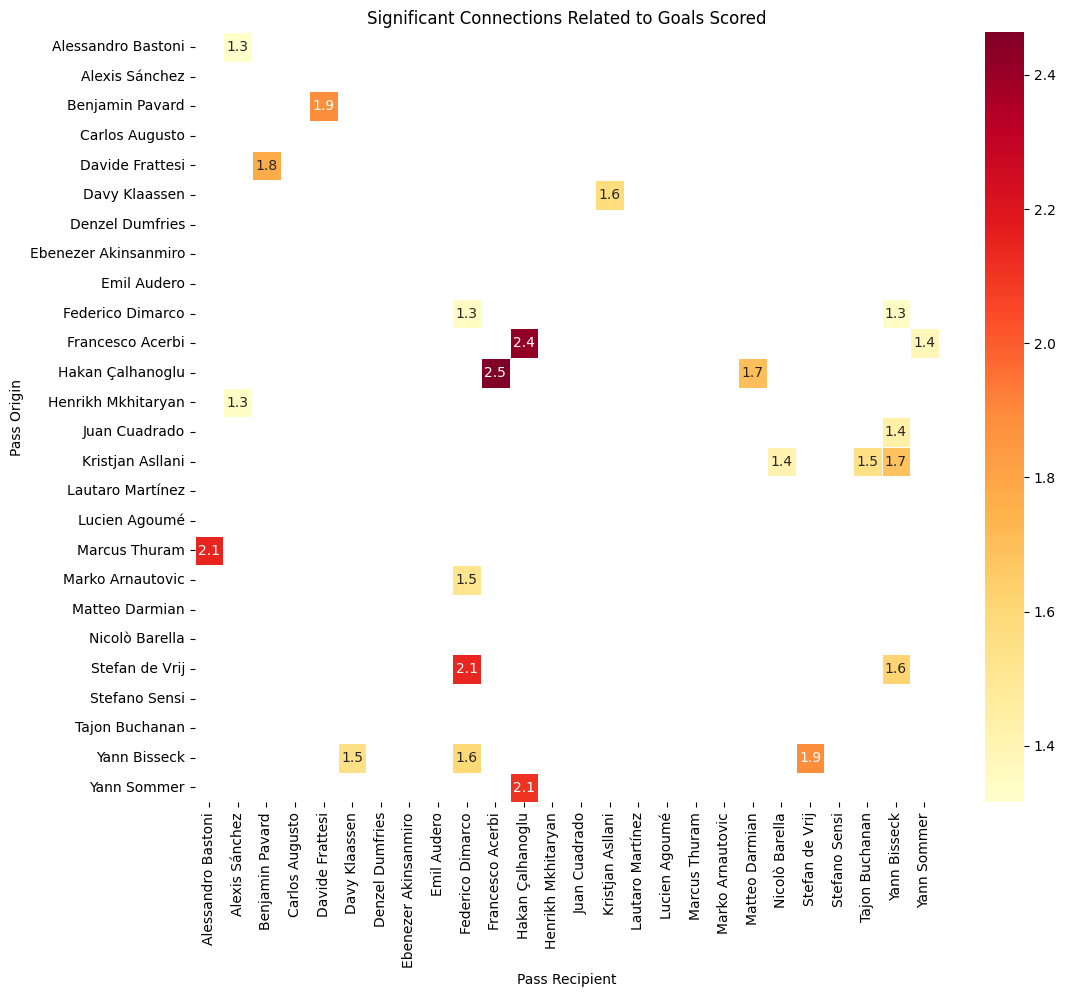

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by matchId and create the design matrix
design_matrix = df_all_events.groupby('matchId').first()[['goals_scored', 'goals_conceded']]
design_matrix['intercept'] = 1  # Add intercept term
design_matrix = design_matrix[['intercept', 'goals_scored', 'goals_conceded']]

# Convert design matrix to numpy array
X = design_matrix.values

# Flatten connectivity matrices for regression analysis
Y = np.array([matrix.flatten() for matrix in aligned_connectivity_matrices])

# Ensure there are no missing values in the design matrix
assert not np.any(np.isnan(X)), "Design matrix contains NaN values"

# Ensure there are no missing values in the response variables
assert not np.any(np.isnan(Y)), "Response variable matrix contains NaN values"

# Function to perform regression analysis and extract coefficients and p-values for a specified contrast
def perform_regression_with_contrast(Y, X, contrast_index):
    results = []
    for i in range(Y.shape[1]):
        model = OLS(Y[:, i], X)
        result = model.fit()
        results.append(result)
    
    # Extract the coefficients and p-values for the contrast of interest
    coefs = np.array([result.params[contrast_index] for result in results])
    pvals = np.array([result.pvalues[contrast_index] for result in results])
    
    return coefs, pvals

# Function to apply contrast
def apply_contrast(Y, X, contrast_index, positive=True):
    coefs, pvals = perform_regression_with_contrast(Y, X, contrast_index)
    if not positive:
        coefs = -coefs
    return coefs, pvals

# Specify the index for the contrast (example: 1 for 'goals_scored' and 2 for 'goals_conceded')
contrast_index = 1  # Example: 'goals_scored'
# Perform regression analysis for the specified contrast
positive_contrast = True  # Set to False for negative contrast
coefs, pvals = apply_contrast(Y, X, contrast_index, positive=positive_contrast)

# Reshape coefficients and p-values to the original connectivity matrix shape
coef_matrix = coefs.reshape((len(all_players), len(all_players)))
pval_matrix = pvals.reshape((len(all_players), len(all_players)))

# Identify significant connections
significant_connections = pval_matrix < 0.05

# Function to visualize p-values
def visualize_pvalues(pval_matrix, players, significance_level=0.05):
    # Replace p-values above the significance level with NaN for better visualization
    pval_matrix_filtered = np.where(pval_matrix < significance_level, pval_matrix, np.nan)
    
    # Avoid taking log of NaN or zero
    with np.errstate(divide='ignore', invalid='ignore'):
        neg_log_pvals = -np.log10(pval_matrix_filtered)
        neg_log_pvals[np.isinf(neg_log_pvals)] = np.nan  # Replace inf with NaN

    # Create a DataFrame for better visualization with labels
    df_pvals = pd.DataFrame(neg_log_pvals, index=players, columns=players)

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_pvals, annot=True, cmap="YlOrRd", cbar=True, linewidths=.5)
    plt.title('Significant Connections Related to Goals Scored')
    plt.xlabel('Pass Recipient')
    plt.ylabel('Pass Origin')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# Visualize p-values
visualize_pvalues(pval_matrix, all_players)


In [ ]:
# Assuming all_connectivity_matrices, all_player_times, and pval_matrix are already calculated
# Set a significance level
alpha = 0.05
# Create a master list of all players who appeared in any match
all_players = set()
for player_times in all_player_times:
    all_players.update(player_times.keys())
all_players = sorted(list(all_players))

# Align each match's connectivity matrix to this master list
aligned_connectivity_matrices = []
for conn_matrix, player_times in zip(all_connectivity_matrices, all_player_times):
    aligned_matrix = np.zeros((len(all_players), len(all_players)))
    for i, player_i in enumerate(all_players):
        if player_i in player_times:
            for j, player_j in enumerate(all_players):
                if player_j in player_times:
                    original_i = list(player_times.keys()).index(player_i)
                    original_j = list(player_times.keys()).index(player_j)
                    aligned_matrix[i, j] = conn_matrix[original_i, original_j]
    aligned_connectivity_matrices.append(aligned_matrix)

# Recompute the significance matrix based on the aligned matrices
significant_connections = np.array([pvals < alpha for pvals in pval_matrix]).reshape((len(all_players), len(all_players)))

# Compute the average connectivity matrix for visualization
avg_connectivity_matrix = np.mean(aligned_connectivity_matrices, axis=0)


In [ ]:
# def plot_players_and_significant_connections(df_passes, significant_connections, players, avg_connectivity_matrix):
#     plt.figure(figsize=(12, 10))

#     # Calculate mean x and y coordinates for each player
#     mean_coordinates = df_passes.groupby('playerName')[['x', 'y']].mean()
#     mean_coordinates.columns = ['mean_x', 'mean_y']

#     # Plot each player as a scatter point
#     for player in players:
#         if player in mean_coordinates.index:
#             mean_x = mean_coordinates.loc[player, 'mean_x']
#             mean_y = mean_coordinates.loc[player, 'mean_y']
#             plt.scatter(mean_x, mean_y, label=player)
#             plt.text(mean_x, mean_y, player, fontsize=9, ha='right')

#     # Plot significant connections
#     for i, player_i in enumerate(players):
#         for j, player_j in enumerate(players):
#             if significant_connections[i, j]:  # Only plot significant connections
#                 if player_i in mean_coordinates.index and player_j in mean_coordinates.index:
#                     x_start = mean_coordinates.loc[player_i, 'mean_x']
#                     y_start = mean_coordinates.loc[player_i, 'mean_y']
#                     x_end = mean_coordinates.loc[player_j, 'mean_x']
#                     y_end = mean_coordinates.loc[player_j, 'mean_y']
#                     plt.plot([x_start, x_end], [y_start, y_end], 'k-', alpha=0.5, linewidth=avg_connectivity_matrix[i, j])

#     plt.xlabel('X Coordinate')
#     plt.ylabel('Y Coordinate')
#     plt.title('Player Passes and Significant Connections')
#     plt.legend()
#     plt.show()

# # Plot the results
# plot_players_and_significant_connections(df_passes, significant_connections, all_players, avg_connectivity_matrix)


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from mplsoccer import Pitch, FontManager

# # Function to plot players and significant connections using mplsoccer
# def plot_players_and_significant_connections_mplsoccer(df_passes, significant_connections, players, avg_connectivity_matrix):
#     pitch = Pitch(pitch_type='opta', line_zorder=4,
#                   pitch_color='#22312b', line_color='#efefef')
#     # draw
#     fig, ax = pitch.draw(figsize=(15, 20))
#     fig.set_facecolor('#22312b')

#     # Calculate mean x and y coordinates for each player
#     mean_coordinates = df_passes.groupby('playerName')[['x', 'y']].mean()
#     mean_coordinates.columns = ['mean_x', 'mean_y']

#     # Function to check if a player has significant connections
#     def has_significant_connections(player_idx):
#         return np.any(significant_connections[player_idx, :]) or np.any(significant_connections[:, player_idx])

#     # Plot each player as a scatter point if they have significant connections
#     for i, player in enumerate(players):
#         if player in mean_coordinates.index and has_significant_connections(i):
#             mean_x = mean_coordinates.loc[player, 'mean_x']
#             mean_y = mean_coordinates.loc[player, 'mean_y']
#             pitch.scatter(mean_x, mean_y, ax=ax, label=player, s=100, edgecolor='k', color='red')
#             ax.text(mean_x, mean_y, player, fontsize=14, ha='center', color='white')

#     # Plot significant connections
#     for i, player_i in enumerate(players):
#         for j, player_j in enumerate(players):
#             if significant_connections[i, j]:  # Only plot significant connections
#                 if player_i in mean_coordinates.index and player_j in mean_coordinates.index:
#                     x_start = mean_coordinates.loc[player_i, 'mean_x']
#                     y_start = mean_coordinates.loc[player_i, 'mean_y']
#                     x_end = mean_coordinates.loc[player_j, 'mean_x']
#                     y_end = mean_coordinates.loc[player_j, 'mean_y']
#                     pitch.lines(x_start, y_start, x_end, y_end, ax=ax, color='green', lw=avg_connectivity_matrix[i, j] * 3, alpha=0.7, zorder=1)

#     plt.show()

# # Assuming connectivity_matrix, players, and significant_connections are already calculated
# plot_players_and_significant_connections_mplsoccer(df_passes, significant_connections, all_players, avg_connectivity_matrix)


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from mplsoccer import Pitch, FontManager
# import ipywidgets as widgets
# from IPython.display import display

# # Function to calculate the most frequent starting eleven
# def get_most_frequent_starting_eleven(df):
#     starting_elevens = []
#     for match_id in df['matchId'].unique():
#         match_events = df[df['matchId'] == match_id]
#         starting_eleven = match_events['playerName'].dropna().unique()[:11]
#         starting_elevens.append(starting_eleven)
    
#     # Flatten the list and count frequencies
#     starting_elevens_flat = [player for sublist in starting_elevens for player in sublist]
#     most_frequent_starting_eleven = pd.Series(starting_elevens_flat).value_counts().head(11).index.tolist()
    
#     return most_frequent_starting_eleven

# # Function to plot players and significant connections using mplsoccer
# def plot_players_and_significant_connections_mplsoccer(df_passes, selected_players, avg_connectivity_matrix):
#     pitch = Pitch(pitch_type='opta', line_zorder=4,
#                   pitch_color='#22312b', line_color='#efefef')
#     # draw
#     fig, ax = pitch.draw(figsize=(15, 20))
#     fig.set_facecolor('#22312b')

#     # Calculate mean x and y coordinates for each player
#     mean_coordinates = df_passes.groupby('playerName')[['x', 'y']].mean()
#     mean_coordinates.columns = ['mean_x', 'mean_y']

#     # Plot each player as a scatter point
#     for player in selected_players:
#         if player in mean_coordinates.index:
#             mean_x = mean_coordinates.loc[player, 'mean_x']
#             mean_y = mean_coordinates.loc[player, 'mean_y']
#             pitch.scatter(mean_x, mean_y, ax=ax, label=player, s=100, edgecolor='k', color='red', zorder = 2)
#             ax.text(mean_x, mean_y, player, fontsize=14, ha='center', color='white')

#     # Plot connections
#     for i, player_i in enumerate(selected_players):
#         for j, player_j in enumerate(selected_players):
#             if player_i in mean_coordinates.index and player_j in mean_coordinates.index:
#                 x_start = mean_coordinates.loc[player_i, 'mean_x']
#                 y_start = mean_coordinates.loc[player_i, 'mean_y']
#                 x_end = mean_coordinates.loc[player_j, 'mean_x']
#                 y_end = mean_coordinates.loc[player_j, 'mean_y']
#                 pitch.lines(x_start, y_start, x_end, y_end, ax=ax, color='green', lw=avg_connectivity_matrix[i, j] * 3, alpha=0.7, zorder=1)

#     plt.show()

# # Function to handle player selection and update plot
# def handle_player_selection(change):
#     selected_players = [dropdown1.value, dropdown2.value, dropdown3.value, dropdown4.value, dropdown5.value,
#                         dropdown6.value, dropdown7.value, dropdown8.value, dropdown9.value, dropdown10.value, dropdown11.value]
#     if len(set(selected_players)) == 11:
#         plot_players_and_significant_connections_mplsoccer(df_passes, selected_players, avg_connectivity_matrix)

# # Assuming df_passes, all_players, and avg_connectivity_matrix are already calculated
# # Calculate the most frequent starting eleven
# most_frequent_starting_eleven = get_most_frequent_starting_eleven(df_passes)

# # Create dropdowns for selecting players
# dropdown1 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[0], description='Player 1:')
# dropdown2 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[1], description='Player 2:')
# dropdown3 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[2], description='Player 3:')
# dropdown4 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[3], description='Player 4:')
# dropdown5 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[4], description='Player 5:')
# dropdown6 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[5], description='Player 6:')
# dropdown7 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[6], description='Player 7:')
# dropdown8 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[7], description='Player 8:')
# dropdown9 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[8], description='Player 9:')
# dropdown10 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[9], description='Player 10:')
# dropdown11 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[10], description='Player 11:')

# dropdown1.observe(handle_player_selection, names='value')
# dropdown2.observe(handle_player_selection, names='value')
# dropdown3.observe(handle_player_selection, names='value')
# dropdown4.observe(handle_player_selection, names='value')
# dropdown5.observe(handle_player_selection, names='value')
# dropdown6.observe(handle_player_selection, names='value')
# dropdown7.observe(handle_player_selection, names='value')
# dropdown8.observe(handle_player_selection, names='value')
# dropdown9.observe(handle_player_selection, names='value')
# dropdown10.observe(handle_player_selection, names='value')
# dropdown11.observe(handle_player_selection, names='value')

# display(dropdown1, dropdown2, dropdown3, dropdown4, dropdown5, dropdown6, dropdown7, dropdown8, dropdown9, dropdown10, dropdown11)

# # Initial plot
# selected_players = [dropdown1.value, dropdown2.value, dropdown3.value, dropdown4.value, dropdown5.value,
#                     dropdown6.value, dropdown7.value, dropdown8.value, dropdown9.value, dropdown10.value, dropdown11.value]
# if len(set(selected_players)) == 11:
#     plot_players_and_significant_connections_mplsoccer(df_passes, selected_players, avg_connectivity_matrix)


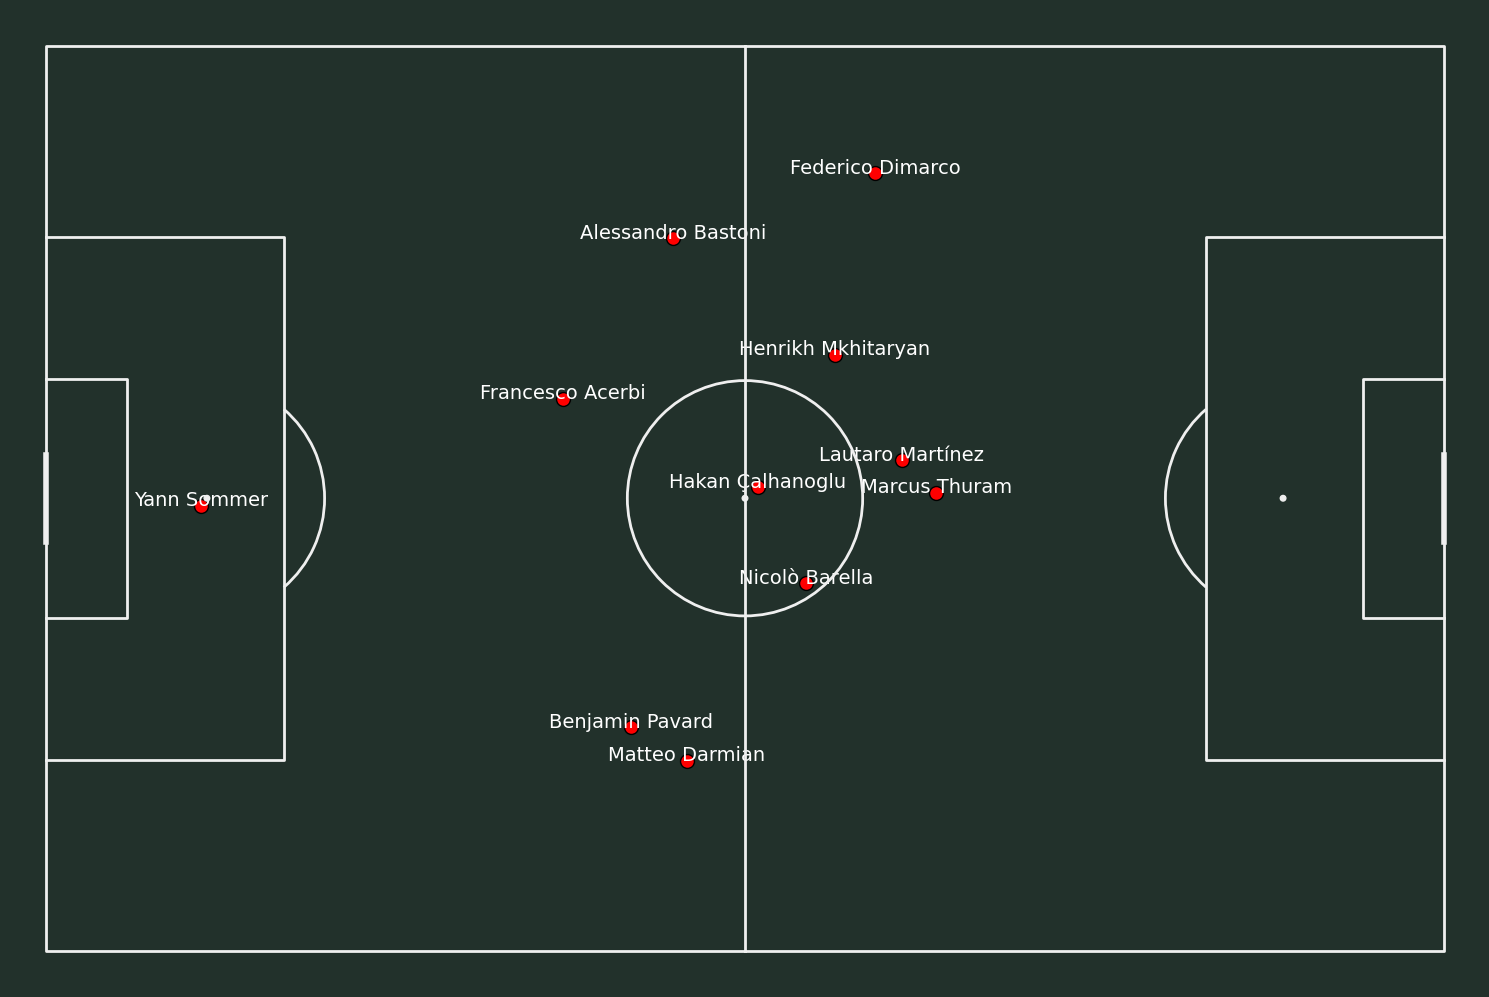

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, FontManager
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Function to calculate the most frequent starting eleven
def get_most_frequent_starting_eleven(df):
    starting_elevens = []
    for match_id in df['matchId'].unique():
        match_events = df[df['matchId'] == match_id]
        starting_eleven = match_events['playerName'].dropna().unique()[:11]
        starting_elevens.append(starting_eleven)
    
    # Flatten the list and count frequencies
    starting_elevens_flat = [player for sublist in starting_elevens for player in sublist]
    most_frequent_starting_eleven = pd.Series(starting_elevens_flat).value_counts().head(11).index.tolist()
    
    return most_frequent_starting_eleven

# Function to plot players and significant connections using mplsoccer
def plot_players_and_significant_connections_mplsoccer(df_passes, selected_players, avg_connectivity_matrix, significant_connections):
    pitch = Pitch(pitch_type='opta', line_zorder=4,
                  pitch_color='#22312b', line_color='#efefef')
    # draw
    fig, ax = pitch.draw(figsize=(15, 20))
    fig.set_facecolor('#22312b')

    # Calculate mean x and y coordinates for each player
    mean_coordinates = df_passes.groupby('playerName')[['x', 'y']].mean()
    mean_coordinates.columns = ['mean_x', 'mean_y']

    # Plot each player as a scatter point
    for player in selected_players:
        if player in mean_coordinates.index:
            mean_x = mean_coordinates.loc[player, 'mean_x']
            mean_y = mean_coordinates.loc[player, 'mean_y']
            pitch.scatter(mean_x, mean_y, ax=ax, label=player, s=100, edgecolor='k', color='red', zorder=2)
            ax.text(mean_x, mean_y, player, fontsize=14, ha='center', color='white')

    # Plot significant connections
    for i, player_i in enumerate(selected_players):
        for j, player_j in enumerate(selected_players):
            if player_i in mean_coordinates.index and player_j in mean_coordinates.index:
                x_start = mean_coordinates.loc[player_i, 'mean_x']
                y_start = mean_coordinates.loc[player_i, 'mean_y']
                x_end = mean_coordinates.loc[player_j, 'mean_x']
                y_end = mean_coordinates.loc[player_j, 'mean_y']
                if significant_connections[all_players.index(player_i), all_players.index(player_j)]:
                    pitch.lines(x_start, y_start, x_end, y_end, ax=ax, color='green', lw=avg_connectivity_matrix[all_players.index(player_i), all_players.index(player_j)] * 3, alpha=0.7, zorder=1)

    plt.show()

# Function to handle player selection and update plot
def handle_player_selection(change):
    selected_players = [dropdown1.value, dropdown2.value, dropdown3.value, dropdown4.value, dropdown5.value,
                        dropdown6.value, dropdown7.value, dropdown8.value, dropdown9.value, dropdown10.value, dropdown11.value]
    if len(set(selected_players)) == 11:
        clear_output(wait=True)
        display(UI)
        plot_players_and_significant_connections_mplsoccer(df_passes, selected_players, avg_connectivity_matrix, significant_connections)

# Assuming df_passes, all_players, and avg_connectivity_matrix are already calculated
# Calculate the most frequent starting eleven
most_frequent_starting_eleven = get_most_frequent_starting_eleven(df_passes)

# Create dropdowns for selecting players
dropdown1 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[0], description='Player 1:')
dropdown2 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[1], description='Player 2:')
dropdown3 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[2], description='Player 3:')
dropdown4 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[3], description='Player 4:')
dropdown5 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[4], description='Player 5:')
dropdown6 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[5], description='Player 6:')
dropdown7 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[6], description='Player 7:')
dropdown8 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[7], description='Player 8:')
dropdown9 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[8], description='Player 9:')
dropdown10 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[9], description='Player 10:')
dropdown11 = widgets.Dropdown(options=all_players, value=most_frequent_starting_eleven[10], description='Player 11:')

dropdown1.observe(handle_player_selection, names='value')
dropdown2.observe(handle_player_selection, names='value')
dropdown3.observe(handle_player_selection, names='value')
dropdown4.observe(handle_player_selection, names='value')
dropdown5.observe(handle_player_selection, names='value')
dropdown6.observe(handle_player_selection, names='value')
dropdown7.observe(handle_player_selection, names='value')
dropdown8.observe(handle_player_selection, names='value')
dropdown9.observe(handle_player_selection, names='value')
dropdown10.observe(handle_player_selection, names='value')
dropdown11.observe(handle_player_selection, names='value')

# Arrange dropdowns in a grid layout
UI = widgets.VBox([
    widgets.HBox([dropdown1, dropdown2, dropdown3]),
    widgets.HBox([dropdown4, dropdown5, dropdown6]),
    widgets.HBox([dropdown7, dropdown8, dropdown9]),
    widgets.HBox([dropdown10, dropdown11])
])

display(UI)

# Initial plot
selected_players = [dropdown1.value, dropdown2.value, dropdown3.value, dropdown4.value, dropdown5.value,
                    dropdown6.value, dropdown7.value, dropdown8.value, dropdown9.value, dropdown10.value, dropdown11.value]
if len(set(selected_players)) == 11:
    plot_players_and_significant_connections_mplsoccer(df_passes, selected_players, avg_connectivity_matrix, significant_connections)


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Flatten connectivity matrices for regression analysis
X = np.array([matrix.flatten() for matrix in aligned_connectivity_matrices])
y = design_matrix['goals_scored'].values

# Perform linear regression
model = LinearRegression()
model.fit(X, y)
coefs = model.coef_

# Reshape coefficients to the original connectivity matrix shape
coef_matrix = coefs.reshape((len(all_players), len(all_players)))

# Identify significant connections (e.g., using a threshold)
threshold = np.percentile(coef_matrix, 95)
significant_connections = coef_matrix > threshold


def plot_players_and_significant_connections_interactive(df_passes, significant_connections, players, coef_matrix):
    # Calculate mean x and y coordinates for each player
    mean_coordinates = df_passes.groupby('playerName')[['x', 'y']].mean()
    mean_coordinates.columns = ['mean_x', 'mean_y']

    # Jitter function to avoid overlap
    def jitter(value, noise=0.5):
        return value + np.random.uniform(-noise, noise)

    # Initialize plotly figure
    fig = go.Figure()

    # Add the pitch background using plotly shapes
    pitch_length = 105
    pitch_width = 68
    fig.add_shape(type="rect", x0=0, y0=0, x1=pitch_length, y1=pitch_width,
                  line=dict(color="black", width=2))

    # Plot each player as a scatter point with jitter to avoid overlap
    for player in players:
        if player in mean_coordinates.index:
            mean_x = mean_coordinates.loc[player, 'mean_x']
            mean_y = mean_coordinates.loc[player, 'mean_y']
            jittered_x = jitter(mean_x)
            jittered_y = jitter(mean_y)
            fig.add_trace(go.Scatter(
                x=[jittered_x], y=[jittered_y], mode='markers+text', name=player,
                marker=dict(size=10, color='red', line=dict(width=2, color='black')),
                text=[player], textposition='top right'
            ))

    # Plot significant connections as lines
    for i, player_i in enumerate(players):
        for j, player_j in enumerate(players):
            if significant_connections[i, j]:  # Only plot significant connections
                if player_i in mean_coordinates.index and player_j in mean_coordinates.index:
                    x_start = mean_coordinates.loc[player_i, 'mean_x']
                    y_start = mean_coordinates.loc[player_i, 'mean_y']
                    x_end = mean_coordinates.loc[player_j, 'mean_x']
                    y_end = mean_coordinates.loc[player_j, 'mean_y']
                    fig.add_trace(go.Scatter(
                        x=[jitter(x_start), jitter(x_end)], y=[jitter(y_start), jitter(y_end)],
                        mode='lines', line=dict(color='blue', width=abs(coef_matrix[i, j]) * 3),
                        opacity=0.7
                    ))

    fig.update_layout(
        title='Player Passes and Significant Connections',
        xaxis=dict(title='X Coordinate', range=[0, pitch_length]),
        yaxis=dict(title='Y Coordinate', range=[0, pitch_width]),
        showlegend=False,
        autosize=False,
        width=800,
        height=600,
        plot_bgcolor='green'
    )

    fig.show()

# Assuming df_passes, all_players, and coef_matrix are already defined
plot_players_and_significant_connections_interactive(df_passes, significant_connections, all_players, coef_matrix)


In [ ]:
from sklearn.linear_model import LinearRegression

# Flatten connectivity matrices for regression analysis
X = np.array([matrix.flatten() for matrix in aligned_connectivity_matrices])
y = design_matrix['goals_scored'].values

# Perform linear regression
model = LinearRegression()
model.fit(X, y)
coefs = model.coef_

# Reshape coefficients to the original connectivity matrix shape
coef_matrix = coefs.reshape((len(all_players), len(all_players)))

# Identify significant connections (e.g., using a threshold)
significant_connections = coef_matrix > np.percentile(coef_matrix, 95)


In [ ]:
from sklearn.linear_model import LinearRegression

# Flatten connectivity matrices for regression analysis
X = np.array([matrix.flatten() for matrix in aligned_connectivity_matrices])
y = design_matrix['goals_scored'].values

# Perform linear regression
model = LinearRegression()
model.fit(X, y)
coefs = model.coef_

# Reshape coefficients to the original connectivity matrix shape
coef_matrix = coefs.reshape((len(all_players), len(all_players)))

# Identify significant connections (e.g., using a threshold)
significant_connections = coef_matrix > np.percentile(coef_matrix, 95)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize significant connections
plt.figure(figsize=(12, 10))
sns.heatmap(significant_connections, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=.5,
            xticklabels=all_players, yticklabels=all_players)
plt.title('Significant Connections Related to Goals Scored')
plt.xlabel('Pass Recipient')
plt.ylabel('Pass Origin')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_connectivity_matrix(connectivity_matrix, players):
    # Create a DataFrame for better visualization with labels
    df_matrix = pd.DataFrame(connectivity_matrix, index=players, columns=players)

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_matrix, annot=True, fmt=".1f", cmap="YlGnBu", cbar=True, linewidths=.5)
    plt.title('Player Connectivity Matrix')
    plt.xlabel('Pass Recipient')
    plt.ylabel('Pass Origin')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# Load the dummy data
file_path = 'try.csv'
df_all_events = pd.read_csv(file_path)

# Calculate connectivity matrix and player time on field
connectivity_matrix, player_time_on_field = calculate_player_time_and_connectivity(df_all_events)

# Visualize the connectivity matrix
players = list(set(df_all_events['playerName'].dropna().unique()) | set(df_all_events['recipient'].dropna().unique()))
visualize_connectivity_matrix(connectivity_matrix, players)


In [ ]:
import pandas as pd
import numpy as np

# Function to initialize starting players
def initialize_starting_players(events_df):
    starting_players = set()
    for player in events_df['playerName']:
        if player not in starting_players and pd.notna(player):
            starting_players.add(player)
        if len(starting_players) == 11:
            break
    return starting_players

# Function to process a single match
def process_match(events_df):
    players_on_field = initialize_starting_players(events_df)  # Track players currently on the field
    player_time_on_field = {player: 0 for player in players_on_field}  # Track time each player spends on the field

    # Print starting players
    print(f"Starting players: {players_on_field}")

    # List of all players involved in the match
    players = list(set(events_df['playerName'].dropna().unique()) | set(events_df['recipient'].dropna().unique()))

    # Initialize connectivity matrix
    n_players = len(players)
    connectivity_matrix = np.zeros((n_players, n_players))
    
    # Track the last time each player was active
    last_active_time = {player: 0 for player in players}

    # Populate matrix with pass counts and handle substitutions
    for index, row in events_df.iterrows():
        if row['type'] == 'Pass':
            if pd.notna(row['playerName']) and pd.notna(row['recipient']):
                start_idx = players.index(row['playerName'])
                end_idx = players.index(row['recipient'])
                connectivity_matrix[start_idx, end_idx] += 1

                # Update last active time
                last_active_time[row['playerName']] = row['expandedMinute']
                last_active_time[row['recipient']] = row['expandedMinute']

        elif row['type'] == 'SubstitutionOff':
            player_off = row['playerName']
            if player_off in players_on_field:
                players_on_field.remove(player_off)
                if player_off in last_active_time:
                    player_time_on_field[player_off] += row['expandedMinute'] - last_active_time[player_off]
                last_active_time[player_off] = row['expandedMinute']

        elif row['type'] == 'SubstitutionOn':
            player_on = row['playerName']
            players_on_field.add(player_on)
            if player_on not in player_time_on_field:
                player_time_on_field[player_on] = 0
            last_active_time[player_on] = row['expandedMinute']

    # Finalize playtime for players still on the field at the end of the match
    final_time = events_df['expandedMinute'].max()
    for player in players_on_field:
        player_time_on_field[player] += final_time - last_active_time[player]

    # Add playtime for players who were substituted off
    for player, last_time in last_active_time.items():
        if player not in players_on_field:
            player_time_on_field[player] += last_time

    return connectivity_matrix, player_time_on_field



In [ ]:
match_ids

In [ ]:
# Process each match
match_ids = df_all_events['matchId'].unique()
all_connectivity_matrices = []
all_player_times = []

for match_id in match_ids:
    match_events = df_all_events[df_all_events['matchId'] == match_id]
    conn_matrix, play_time = process_match(match_events)
    all_connectivity_matrices.append(conn_matrix)
    all_player_times.append(play_time)

# Print results for the first match
print("Connectivity Matrix for Match 1:")
print(all_connectivity_matrices[0])

print("\nPlayer Time on Field for Match 1:")
print(all_player_times[0])


In [ ]:
# Process each match
match_ids = df_all_events['matchId'].unique()
all_connectivity_matrices = []
all_player_times = []

for match_id in match_ids:
    match_events = df_all_events[df_all_events['matchId'] == match_id]
    conn_matrix, play_time = process_match(match_events)
    all_connectivity_matrices.append(conn_matrix)
    all_player_times.append(play_time)

# Print results for the first match
print("Connectivity Matrix for Match 1:")
print(all_connectivity_matrices[0])

print("\nPlayer Time on Field for Match 1:")
print(all_player_times[0])


In [ ]:
import pandas as pd
import numpy as np

# Sample data for passes (df_passes)
data_passes = [
    {'id': 2682534001, 'eventId': 5, 'minute': 0, 'second': 55.0, 'teamId': 75, 'x': 19.6, 'y': 18.5, 'expandedMinute': 0, 'period': 'FirstHalf', 'type': 'Pass', 'teamName': 'Inter', 'h_a': 'a', 'playerName': 'Stefan de Vrij', 'matchId': 1746386, 'score': '1 : 0', 'isOwnGoal': None, 'result_class': 'Loss', 'goals': (0, 1), 'goals_scored': 0, 'goals_conceded': 1},
    {'id': 2682534002, 'eventId': 6, 'minute': 0, 'second': 56.0, 'teamId': 75, 'x': 27.8, 'y': 12.1, 'expandedMinute': 0, 'period': 'FirstHalf', 'type': 'Pass', 'teamName': 'Inter', 'h_a': 'a', 'playerName': 'Benjamin Pavard', 'matchId': 1746386, 'score': '1 : 0', 'isOwnGoal': None, 'result_class': 'Loss', 'goals': (0, 1), 'goals_scored': 0, 'goals_conceded': 1},
    {'id': 2682534003, 'eventId': 8, 'minute': 0, 'second': 58.0, 'teamId': 75, 'x': 27.7, 'y': 35.3, 'expandedMinute': 0, 'period': 'FirstHalf', 'type': 'Pass', 'teamName': 'Inter', 'h_a': 'a', 'playerName': 'Kristjan Asllani', 'matchId': 1746386, 'score': '1 : 0', 'isOwnGoal': None, 'result_class': 'Loss', 'goals': (0, 1), 'goals_scored': 0, 'goals_conceded': 1},
    {'id': 2682534004, 'eventId': 9, 'minute': 1, 'second': 2.0, 'teamId': 75, 'x': 28.8, 'y': 71.0, 'expandedMinute': 1, 'period': 'FirstHalf', 'type': 'Pass', 'teamName': 'Inter', 'h_a': 'a', 'playerName': 'Carlos Augusto', 'matchId': 1746386, 'score': '1 : 0', 'isOwnGoal': None, 'result_class': 'Loss', 'goals': (0, 1), 'goals_scored': 0, 'goals_conceded': 1},
    {'id': 2682534005, 'eventId': 10, 'minute': 1, 'second': 4.0, 'teamId': 75, 'x': 14.2, 'y': 53.7, 'expandedMinute': 1, 'period': 'FirstHalf', 'type': 'Pass', 'teamName': 'Inter', 'h_a': 'a', 'playerName': 'Alessandro Bastoni', 'matchId': 1746386, 'score': '1 : 0', 'isOwnGoal': None, 'result_class': 'Loss', 'goals': (0, 1), 'goals_scored': 0, 'goals_conceded': 1},
]

# Sample data for substitutions off (df_sub_off)
data_sub_off = [
    {'id': 2682534006, 'eventId': 11, 'minute': 20, 'second': 0.0, 'teamId': 75, 'x': np.nan, 'y': np.nan, 'expandedMinute': 20, 'period': 'FirstHalf', 'type': 'SubstitutionOff', 'teamName': 'Inter', 'h_a': 'a', 'playerName': 'Kristjan Asllani', 'matchId': 1746386, 'score': '1 : 0', 'isOwnGoal': None, 'result_class': 'Loss', 'goals': (0, 1), 'goals_scored': 0, 'goals_conceded': 1},
    {'id': 2682534007, 'eventId': 12, 'minute': 30, 'second': 0.0, 'teamId': 75, 'x': np.nan, 'y': np.nan, 'expandedMinute': 30, 'period': 'FirstHalf', 'type': 'SubstitutionOff', 'teamName': 'Inter', 'h_a': 'a', 'playerName': 'Benjamin Pavard', 'matchId': 1746386, 'score': '1 : 0', 'isOwnGoal': None, 'result_class': 'Loss', 'goals': (0, 1), 'goals_scored': 0, 'goals_conceded': 1},
]

# Sample data for substitutions on (df_sub_on)
data_sub_on = [
    {'id': 2682534008, 'eventId': 13, 'minute': 20, 'second': 0.0, 'teamId': 75, 'x': np.nan, 'y': np.nan, 'expandedMinute': 20, 'period': 'FirstHalf', 'type': 'SubstitutionOn', 'teamName': 'Inter', 'h_a': 'a', 'playerName': 'Player4', 'matchId': 1746386, 'score': '1 : 0', 'isOwnGoal': None, 'result_class': 'Loss', 'goals': (0, 1), 'goals_scored': 0, 'goals_conceded': 1},
    {'id': 2682534009, 'eventId': 14, 'minute': 30, 'second': 0.0, 'teamId': 75, 'x': np.nan, 'y': np.nan, 'expandedMinute': 30, 'period': 'FirstHalf', 'type': 'SubstitutionOn', 'teamName': 'Inter', 'h_a': 'a', 'playerName': 'Player5', 'matchId': 1746386, 'score': '1 : 0', 'isOwnGoal': None, 'result_class': 'Loss', 'goals': (0, 1), 'goals_scored': 0, 'goals_conceded': 1},
]

# Create DataFrames
df_passes = pd.DataFrame(data_passes)
df_sub_off = pd.DataFrame(data_sub_off)
df_sub_on = pd.DataFrame(data_sub_on)

# Merge DataFrames
df_all_events = pd.concat([df_passes, df_sub_off, df_sub_on], ignore_index=True)
df_all_events = df_all_events.sort_values(by=['matchId', 'expandedMinute']).reset_index(drop=True)

# Shift the DataFrame to get the next player's name as the recipient
df_passes['recipient'] = df_passes['playerName'].shift(-1)
df_passes['next_teamId'] = df_passes['teamId'].shift(-1)
df_passes['next_matchId'] = df_passes['matchId'].shift(-1)

# Ensure the recipient is from the same team and the same match
df_passes['recipient'] = df_passes.apply(
    lambda row: row['recipient'] if (row['teamId'] == row['next_teamId']) and (row['matchId'] == row['next_matchId']) else None,
    axis=1
)

# Drop the helper columns
df_passes = df_passes.drop(columns=['next_teamId', 'next_matchId'])

# Update df_all_events with recipients
df_all_events = pd.concat([df_passes, df_sub_off, df_sub_on], ignore_index=True)
df_all_events = df_all_events.sort_values(by=['matchId', 'expandedMinute']).reset_index(drop=True)

# Check data structure and contents
print("Data structure and contents before processing:")
print(df_all_events.head(20))

# Function to initialize players on field at match start
def initialize_starting_players(events_df):
    # Extract the first 11 unique players on field
    starting_players = set()
    for player in events_df['playerName']:
        if player not in starting_players and pd.notna(player):
            starting_players.add(player)
        if len(starting_players) == 11:
            break
    return starting_players

# Function to process a single match
def process_match(events_df):
    players_on_field = initialize_starting_players(events_df)  # Track players currently on the field
    player_time_on_field = {player: 0 for player in players_on_field}  # Track time each player spends on the field

    print(f"Starting players: {players_on_field}")

    # List of all players involved in the match
    players = list(set(events_df['playerName'].dropna().unique()) | set(events_df['recipient'].dropna().unique()))

    # Initialize connectivity matrix
    n_players = len(players)
    connectivity_matrix = np.zeros((n_players, n_players))
    
    # Track the last time each player was active
    last_active_time = {player: 0 for player in players}

    # Populate matrix with pass counts and handle substitutions
    for index, row in events_df.iterrows():
        if row['type'] == 'Pass':
            if pd.notna(row['playerName']) and pd.notna(row['recipient']):
                start_idx = players.index(row['playerName'])
                end_idx = players.index(row['recipient'])
                connectivity_matrix[start_idx, end_idx] += 1

                # Update last active time
                last_active_time[row['playerName']] = row['expandedMinute']
                last_active_time[row['recipient']] = row['expandedMinute']

        elif row['type'] == 'SubstitutionOff':
            player_off = row['playerName']
            if player_off in players_on_field:
                players_on_field.remove(player_off)
                if player_off in last_active_time:
                    player_time_on_field[player_off] += row['expandedMinute'] - last_active_time[player_off]
                last_active_time[player_off] = row['expandedMinute']

        elif row['type'] == 'SubstitutionOn':
            player_on = row['playerName']
            players_on_field.add(player_on)
            if player_on not in player_time_on_field:
                player_time_on_field[player_on] = 0
            last_active_time[player_on] = row['expandedMinute']

    # Finalize playtime for players still on the field at the end of the match
    final_time = events_df['expandedMinute'].max()
    for player in players_on_field:
        player_time_on_field[player] += final_time - last_active_time[player]

    return connectivity_matrix, player_time_on_field

# Process each match
match_ids = df_all_events['matchId'].unique()
all_connectivity_matrices = []
all_player_times = []

for match_id in match_ids:
    match_events = df_all_events[df_all_events['matchId'] == match_id]
    conn_matrix, play_time = process_match(match_events)
    all_connectivity_matrices.append(conn_matrix)
    all_player_times.append(play_time)

# Example: Print results for the first match
print("Connectivity Matrix for Match 1:")
print(all_connectivity_matrices[0])

print("\nPlayer Time on Field for Match 1:")
print(all_player_times[0])


In [ ]:

# Process the match
connectivity_matrix, player_time_on_field = process_match(df)

print("Connectivity Matrix:")
print(connectivity_matrix)

print("\nPlayer Time on Field:")
print(player_time_on_field)

# For multiple matches, you can iterate over each match's data
all_matches_data = [df]  # Replace with your list of dataframes for each match
all_connectivity_matrices = []
all_player_times = []

for match_df in all_matches_data:
    conn_matrix, play_time = process_match(match_df)
    all_connectivity_matrices.append(conn_matrix)
    all_player_times.append(play_time)

# Now you have connectivity matrices and play times for each match
# You can proceed to aggregate and analyze them as needed


In [ ]:

# Step 6: Correlate with performance metrics
performance_data = pd.read_csv('performance_data.csv')
final_df = pd.merge(aggregated_metrics, performance_data, on='player')

# Perform correlation analysis
correlations = final_df.corr()
print(correlations)


In [ ]:
# Plotting results
pitch = Pitch(pitch_type='opta', line_zorder=2, pitch_color='#22312b', line_color='#efefef')
fig, ax = pitch.draw(figsize=(10, 6.5))
fig.set_facecolor('#22312b')

# Show only significant correlations
significant_contrast_map = np.where(p_value_map < 0.05, contrast_map, np.nan)

pcm = ax.imshow(significant_contrast_map, extent=pitch.extent, cmap='coolwarm', vmin=-1, vmax=1)
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
plt.title('Significant Areas Related to the Contrast (p < 0.05)')
plt.show()

In [ ]:

# Plotting results
pitch = Pitch(pitch_type='opta', line_zorder=2, pitch_color='#22312b', line_color='#efefef')
fig, ax = pitch.draw(figsize=(10, 6.5))
fig.set_facecolor('#22312b')

# Show only significant correlations
significant_contrast_map = np.where(p_value_map < 0.05, contrast_map, np.nan)

pcm = ax.imshow(significant_contrast_map, extent=pitch.extent, cmap='coolwarm', vmin=-1, vmax=1)
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
plt.title('Significant Areas Related to Goals Scored (p < 0.05)')
plt.show()

In [ ]:
contrast_map

In [ ]:
# Plotting
result = list(maps_stats.values())[0]
result['statistic'] = contrast_map

pitch = Pitch(pitch_type='opta', line_zorder=4,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
pcm = pitch.heatmap(result, ax=ax, cmap='hot', edgecolors='#22312b')#, vmax = 0.01)
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

In [ ]:

# Static Analysis Function
def static_analysis(s_map, parameter):
    # Convert to arrays for statistical analysis
    maps_stack = np.stack(s_map)
    parameter_normalized = (parameter - np.mean(parameter)) / np.std(parameter)

    # Regression Analysis (Correlation)
    corr_map = np.zeros(binsize)
    p_map = np.zeros(binsize)

    for i in range(binsize[1]):
        for j in range(binsize[0]):
            corr, p_val = stats.pearsonr(maps_stack[:, i, j], parameter_normalized)
            corr_map[i, j] = corr
            p_map[i, j] = p_val

    return corr_map, p_map


In [ ]:
# Apply Static Analysis
corr_map, p_map = static_analysis(s_map, goals_conceeded)

In [ ]:

# Optional: Correct for multiple comparisons (e.g., Bonferroni correction)
flattened_p_vals = p_map.ravel()
corrected_p_vals = multipletests(flattened_p_vals, method='fdr_bh')[1]
corrected_p_map = corrected_p_vals.reshape(binsize)
# Set the p-value threshold
p_threshold = 0.05

# Mask out non-significant values
significant_corr_map = np.where(p_map < p_threshold, corr_map, np.nan)

In [ ]:

# Plotting
result = list(maps_stats.values())[0]
result['statistic'] = significant_corr_map

pitch = Pitch(pitch_type='opta', line_zorder=4,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
pcm = pitch.heatmap(result, ax=ax, cmap='hot_r', edgecolors='#22312b')#, vmax = 0.01)
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')


In [ ]:
import numpy as np
import scipy.stats as stats
from scipy.ndimage import label, generate_binary_structure
from statsmodels.stats.multitest import multipletests

# Assuming binsize and other necessary imports are defined

# Static Analysis Function
def static_analysis(s_map, parameter, n_permutations=1000, voxel_p_threshold=0.01, cluster_p_threshold=0.05):
    # Convert to arrays for statistical analysis
    maps_stack = np.stack(s_map)
    parameter_normalized = (parameter - np.mean(parameter)) / np.std(parameter)

    # Regression Analysis (Correlation)
    corr_map = np.zeros(binsize)
    p_map = np.zeros(binsize)

    for i in range(binsize[0]):
        for j in range(binsize[1]):
            corr, p_val = stats.pearsonr(maps_stack[:, i, j], parameter_normalized)
            corr_map[i, j] = corr
            p_map[i, j] = p_val

    # Apply voxel-level threshold and find clusters
    sig_voxels = p_map < voxel_p_threshold
    structure = generate_binary_structure(2, 1)  # 8-connectivity for 2D
    labeled_array, num_features = label(sig_voxels, structure)

    # Permutation test for clusters
    max_cluster_sizes = []
    for _ in range(n_permutations):
        permuted_params = np.random.permutation(parameter_normalized)
        perm_corr_map = np.zeros(binsize)
        perm_p_map = np.zeros(binsize)

        for i in range(binsize[0]):
            for j in range(binsize[1]):
                corr, p_val = stats.pearsonr(maps_stack[:, i, j], permuted_params)
                perm_p_map[i, j] = p_val

        # Threshold and label permuted map
        perm_sig_voxels = perm_p_map < voxel_p_threshold
        perm_labeled_array, perm_num_features = label(perm_sig_voxels, structure)
        perm_cluster_sizes = np.array([np.sum(perm_labeled_array == i) for i in range(1, perm_num_features + 1)])
        max_cluster_sizes.append(np.max(perm_cluster_sizes) if perm_cluster_sizes.size > 0 else 0)

    # Determine cluster size threshold
    cluster_threshold = np.percentile(max_cluster_sizes, 100 * (1 - cluster_p_threshold))

    # Identify significant clusters
    cluster_sizes = np.array([np.sum(labeled_array == i) for i in range(1, num_features + 1)])
    significant_clusters = cluster_sizes > cluster_threshold
    significant_cluster_labels = [i for i, is_sig in enumerate(significant_clusters, 1) if is_sig]
    corrected_p_map = np.isin(labeled_array, significant_cluster_labels).astype(int)

    return corr_map, corrected_p_map

# Apply Static Analysis with Cluster Correction
corr_map, corrected_p_map = static_analysis(s_map, goals_conceeded, n_permutations=100)

# Plotting with matplotlib (can integrate with mplsoccer for advanced soccer pitch visualizations)
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

# Plotting
result = list(maps_stats.values())[0]
result['statistic'] = corr_map
# setup pitch
pitch = Pitch(pitch_type='opta', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
pcm = pitch.heatmap(result, ax=ax, cmap='hot_r', edgecolors='#22312b')#, vmax = 0.01)
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')


In [ ]:
# setup pitch
pitch = Pitch(pitch_type='opta', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(df.x, df.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

In [ ]:
bin_statistic['statistic'].shape